<a href="https://colab.research.google.com/github/ArchisKhuspe/Twitter-Sentiment-Analysis-Using-Python/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Description: A sentiment analysis program that parses tweets fetched from Twitter using Python

In [ ]:
# Importing the libraries
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
# Twitter API credentials
consumerKey = "AUa92A9NbTzn1EvSIhTnZHEWK"
consumerSecret = "uOfdopZISposdeyes05x1gwtWGPgTJDWTpm5F7mQ14whCK3ZFC"
accessToken = "1345763618835423232-I2mihkfyHm0LtojXqbFn87ACufHzvk"
accessTokenSecret = "wFnQuW2zh4Rh2r1uibJQPNYfhNsV8PGroFknqQ143RWx1"

In [ ]:
# Creating the authentication object
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret)

# Setting the acess token and access token secret
authenticate.set_access_token(accessToken, accessTokenSecret)

# Creating the API object
api = tweepy.API(authenticate, wait_on_rate_limit = True)

In [ ]:
# Specifying the twitter account and extracting tweets from that account
posts = api.user_timeline(screen_name = "@JoeBiden", count = 50, langye = "en", tweet_mode = "extended")

# Printing the last 5 tweets from the account
print("Show the 5 recent tweets: \n")
i = 1
for tweet in posts[0:5]:
  print(str(i) + ') ' + tweet.full_text + '\n')
  i = i + 1

Show the 5 recent tweets: 

1) There’s a clear choice in the midterms: there’s a party that works for people and is focused on the future—and a party that works for one man and is focused on relitigating the past. https://t.co/j82xpPppwx

2) Over the last year, we have seen the grit and determination of the American people in the face of some of the biggest challenges. But I believe the best days of our country are ahead of us. We will get through this. https://t.co/ViiocVN6Oc

3) While the Omicron variant may be a cause for concern, it’s not cause for panic. Between vaccines and boosters to masks and at-home tests, we have the tools to save lives and keep our businesses and schools open. https://t.co/8aqqDGmCVJ

4) More than 200 million Americans are vaccinated.
One billion free COVID-19 tests are available for Americans to order. 
More than 400 million free masks will soon be distributed to communities nationwide.

We will get through this pandemic together.

5) One year ago, we prom

In [ ]:
# Creating a dataframe with a column
df = pd.DataFrame([tweet.full_text for tweet in posts], columns = ['Tweets'])

# Showing the first 5 rows of data
df.head()

,Tweets
0,There’s a clear choice in the midterms: there’...
1,"Over the last year, we have seen the grit and ..."
2,While the Omicron variant may be a cause for c...
3,More than 200 million Americans are vaccinated...
4,"One year ago, we promised that we would move q..."


In [ ]:
# Text Formatting

# Creating a function to format the tweets
def cleanTxt(text):
  text = re.sub(r'@[A-Za-z0-9]+', '', text) #Removed @mentions
  text = re.sub(r'#', '', text) #Removing the '#' symbol
  text = re.sub(r'RT[\s]+', '', text) #Removing RT
  text = re.sub(r'https?:\/\/\S+', '', text) #Remove the hyperlink

  return text

# Formatting the text
df['Tweets'] = df['Tweets'].apply(cleanTxt)

# Showing the formatted text
df

,Tweets
0,There’s a clear choice in the midterms: there’...
1,"Over the last year, we have seen the grit and ..."
2,While the Omicron variant may be a cause for c...
3,More than 200 million Americans are vaccinated...
4,"One year ago, we promised that we would move q..."
5,Tune in tonight as Vice President and I host ...
6,": The last year has been a year of challenges,..."
7,"One year ago, we started to write an American ..."
8,I've never been more optimistic about America'...
9,: 210 million Americans fully vaccinated.\n96%...


In [ ]:
# Creating a function to get the subjectivity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

# Creating a function to get the polarity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

# Creating two new columns
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

# Showing the new dataframe with the new columns
df

,Tweets,Subjectivity,Polarity
0,There’s a clear choice in the midterms: there’...,0.316667,-0.075000
1,"Over the last year, we have seen the grit and ...",0.122222,0.333333
2,While the Omicron variant may be a cause for c...,0.500000,0.000000
3,More than 200 million Americans are vaccinated...,0.600000,0.440000
4,"One year ago, we promised that we would move q...",0.166667,0.111111
5,Tune in tonight as Vice President and I host ...,0.250000,-0.016667
6,": The last year has been a year of challenges,...",0.483333,0.000000
7,"One year ago, we started to write an American ...",0.325000,0.225000
8,I've never been more optimistic about America'...,0.312500,0.250000
9,: 210 million Americans fully vaccinated.\n96%...,0.500000,0.000000


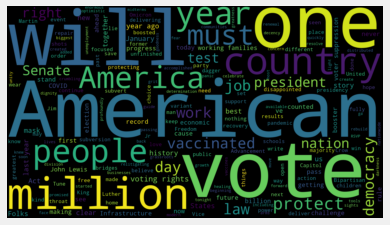

In [ ]:
# Plotting the Word Cloud
allWords = ' '.join( [twts for twts in df['Tweets']] )
wordCloud = WordCloud(width = 1920, height = 1080, random_state = 50, max_font_size = 500).generate(allWords)

plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()


In [ ]:
# Creating a function to compute the negative, neutral and positive analyses
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

df['Analysis'] = df['Polarity'].apply(getAnalysis)

# Showing the dataframe
df

,Tweets,Subjectivity,Polarity,Analysis
0,There’s a clear choice in the midterms: there’...,0.316667,-0.075000,Negative
1,"Over the last year, we have seen the grit and ...",0.122222,0.333333,Positive
2,While the Omicron variant may be a cause for c...,0.500000,0.000000,Neutral
3,More than 200 million Americans are vaccinated...,0.600000,0.440000,Positive
4,"One year ago, we promised that we would move q...",0.166667,0.111111,Positive
5,Tune in tonight as Vice President and I host ...,0.250000,-0.016667,Negative
6,": The last year has been a year of challenges,...",0.483333,0.000000,Neutral
7,"One year ago, we started to write an American ...",0.325000,0.225000,Positive
8,I've never been more optimistic about America'...,0.312500,0.250000,Positive
9,: 210 million Americans fully vaccinated.\n96%...,0.500000,0.000000,Neutral


In [ ]:
# Printing all the positive tweets
j=1
sortedDF = df.sort_values(by=['Polarity'], ascending='True')
for i in range(0, sortedDF.shape[0]):
  if(sortedDF['Analysis'][i] == 'Positive'):
    print(str(j) + ') ' + sortedDF['Tweets'][i])
    print()
    j = j+1

1) Over the last year, we have seen the grit and determination of the American people in the face of some of the biggest challenges. But I believe the best days of our country are ahead of us. We will get through this. 

2) More than 200 million Americans are vaccinated.
One billion free COVID-19 tests are available for Americans to order. 
More than 400 million free masks will soon be distributed to communities nationwide.

We will get through this pandemic together.

3) One year ago, we promised that we would move quickly to deliver results for working families. From getting shots in arms and getting people back to work, to passing laws to create jobs and rebuild our crumbling infrastructure, we are making progress for the American people.

4) One year ago, we started to write an American story of hope, not fear. 
Of unity, not division. 
Of light, not darkness.

An American story of decency and dignity.
Of love and of healing.
Of greatness and of goodness.

May this be the story tha

In [ ]:
# Printing all the negative tweets
j=1
sortedDF = df.sort_values(by=['Polarity'], ascending='False')
for i in range(0, sortedDF.shape[0]):
  if(sortedDF['Analysis'][i] == 'Negative'):
    print(str(j) + ') ' + sortedDF['Tweets'][i])
    print()
    j = j+1

1) There’s a clear choice in the midterms: there’s a party that works for people and is focused on the future—and a party that works for one man and is focused on relitigating the past. 

2) Tune in tonight as Vice President  and I host a grassroots event to celebrate what we’ve accomplished this past year and what’s next. RSVP now.


3) : I am profoundly disappointed that the Senate has failed to stand up for our democracy. I am disappointed — but I am not deterred…

4) : Jim Crow 2.0 is about two insidious things: voter suppression and election subversion. It’s about making it harder to vote, who…

5) On Martin Luther King, Jr. Day, we must protect the hard-fought gains he helped achieve—and continue his unfinished struggle for a freer and more just society by raising our voices to confront abuses of power, challenge hate and discrimination, and protect the right to vote.

6) Across the country, 45,000 of our bridges are in desperate need of repair. My Bipartisan Infrastructure Law i

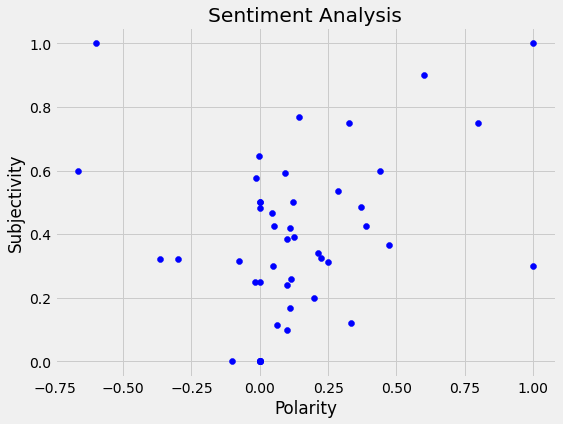

In [ ]:
# Plotting the polarity and subjectivity
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
  plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color = 'Blue')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [ ]:
# Getting the percentage of positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']

round((ptweets.shape[0] / df.shape[0])*100, 1)

58.0

In [ ]:
# Getting the percentage of negative tweets
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']

round((ntweets.shape[0] / df.shape[0])*100, 1)

18.0

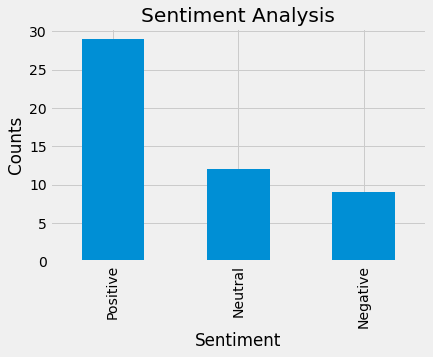

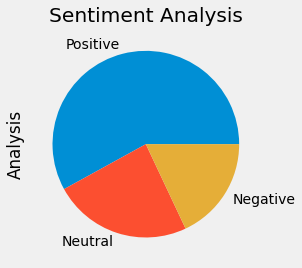

In [ ]:
# Showing the value counts

df['Analysis'].value_counts()

# Plotting and visualising the counts (Bar)
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()

# Plotting and visualising the counts (Pie)
plt.title('Sentiment Analysis')
df['Analysis'].value_counts().plot(kind='pie')
plt.show()